In [1]:
rounds = 100
num_users = 10 # number of clients
target_test_acc = 0.99
lrs = [0.1]
lr = 0.1
C = 1
E = 5
B = 10 # 'all' for a single minibatch
result_per_lr = {}

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [3]:
dir = ''

In [4]:
with open(dir+'result_per_lr_10_1_5_0.1.pickle', 'rb') as handle:
    result_per_lr = pickle.load(handle)

In [5]:
# print(result_per_lr)

In [6]:
max_acc = max(result_per_lr[lr]['test_accs'])
print("max accuracy:", max_acc)

max accuracy: 0.9886


In [7]:
max_acc_rount = 0
def get_plotted_metrics(result_per_lr, c_rounds):
    plotted_train_accs= []
    plotted_test_accs = []
    plotted_train_losses = []
    plotted_test_losses = []
    max_acc_rount = 0
    for c in range(c_rounds):
        if result_per_lr[lr]['test_accs'][c] == max_acc:
            max_acc_rount = c
        plotted_train_accs.append(result_per_lr[lr]['train_accs'][c])
        plotted_test_accs.append(result_per_lr[lr]['test_accs'][c])
        plotted_train_losses.append(result_per_lr[lr]['train_losses'][c])
        plotted_test_losses.append(result_per_lr[lr]['test_losses'][c])

    return plotted_train_accs, plotted_test_accs, plotted_train_losses, plotted_test_losses, max_acc_rount

In [8]:
plotted_train_accs, plotted_test_accs, plotted_train_losses, plotted_test_losses, max_acc_rount = get_plotted_metrics(result_per_lr, rounds)

In [9]:
print(max_acc_rount)
print(result_per_lr[lr]['test_accs'][max_acc_rount])
print(max_acc)

84
0.9886
0.9886


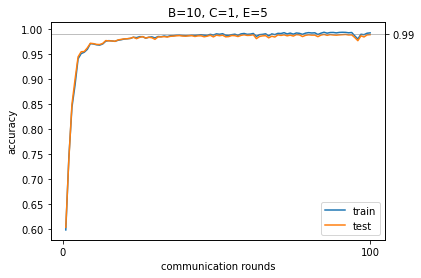

In [10]:
fig, ax = plt.subplots()
ax.plot(range(1, len(plotted_train_accs)+1), plotted_train_accs, label='train')
ax.plot(range(1,len(plotted_test_accs)+1), plotted_test_accs, label='test')
ax.set_xticks(np.arange(0, len(plotted_test_accs)+1, 100))
ax.axhline(y=target_test_acc, color='grey', linestyle='-', linewidth=0.5)
ax.set_ylabel('accuracy')

ax.set_xlabel('communication rounds')
ax.set_title('B={}, C={}, E={}'.format(B, C, E))
ax.legend()

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks([target_test_acc])

plt.show()

In [11]:
n_round_at_target = None
for i,acc in enumerate(plotted_test_accs):
    if acc>=target_test_acc:
        print("the number of rounds to achieve target test-accuracy: ")
        n_round_at_target = i
        print(n_round_at_target)
        break;

In [12]:
loss_at_target = None
for i,loss in enumerate(plotted_test_losses):
    if n_round_at_target and i==n_round_at_target-1:
        print("loss at target test-accuracy: ")
        loss_at_target = loss
        print(loss_at_target)
        break;